In [9]:
import qiskit, sys
import numpy as np
import qtm.qcompilation, qtm.ansatz, qtm.constant
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2
print(qtm.constant.noise_prob)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
0.03


In [10]:
time = 10

for i in range(0, time):
    num_qubits = 5
    num_layers = 2
    thetas = np.ones(num_layers*num_qubits*2)

    compiler = qtm.qcompilation.QuantumCompilation(
        u = qtm.ansatz.create_polygongraph_ansatz,
        vdagger = qtm.state.create_ghz_state(num_qubits).inverse(),
        optimizer = 'qng_fubini_study',
        loss_func = 'loss_fubini_study',
        thetas = thetas,
        num_layers = num_layers
    )
    compiler.fit(num_steps=200, verbose = 1)
    compiler.save(path = f'./noise_qng_polygon/{i}', text=f'{qtm.constant.noise_prob}', save_all = True)
    print(f"Done {time}!")

Step:  78%|███████▊  | 155/200 [02:46<00:49,  1.10s/it]

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


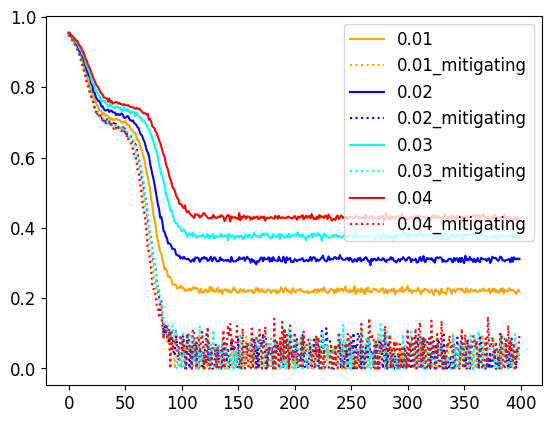

In [33]:
import pandas as pd
noises = [0.01, 0.02, 0.03, 0.04]
color = ["orange", "blue", "cyan", "red"]
i = 0
for noise in noises:
    loss = pd.read_csv("./tomography/noise_qng_polygon/loss_values" + str(noise) + ".csv", sep=",", header=None)
    plt.plot(loss, color = color[i], label = noise)
    loss_mitigating = pd.read_csv("./tomography/noise_qng_polygon/loss_values" + str(noise) + "_mitigating.csv", sep=",", header=None)
    plt.plot(loss_mitigating, color = color[i], linestyle = "dotted", label = str(noise) + '_mitigating')
    i = i + 1
plt.legend()
plt.savefig('compare_loss_mitigating.eps', format = 'eps', dpi = 1000)

In [7]:
print(losss_mitigating)

[]


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


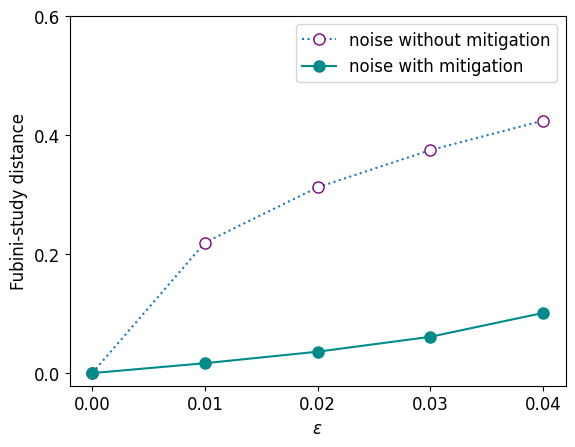

In [17]:
import pandas as pd
color = ["orange", "blue", "cyan", "red"]
losss = []
losss_mitigating = []
noises = [0.0, 0.01, 0.02, 0.03, 0.04]
for noise in noises:
    loss = pd.read_csv("./tomography/noise_qng_polygon/loss_values" + str(noise) + ".csv", sep=",", header=None)
    loss = np.asarray(loss)
    losss.append((loss[-1]))
    loss_mitigating = pd.read_csv("./tomography/noise_qng_polygon/loss_values" + str(noise) + "_mitigating.csv", sep=",", header=None)
    loss_mitigating = np.asarray(loss_mitigating)
    print(type(loss_mitigating))
    losss_mitigating.append((loss_mitigating[-1][0]))
plt.plot(noises, losss, marker = 'o', mec = 'purple', mfc = 'white', linestyle = 'dotted', markersize = 8, label = 'noise without mitigation')
plt.plot(noises, losss_mitigating, color = 'darkcyan', marker = 'o', markersize = 8, label = 'noise with mitigation')
plt.xticks([0.0, 0.01, 0.02, 0.03, 0.04])
plt.yticks([0.0, 0.2, 0.4, 0.6])
plt.ylabel('Fubini-study distance')
plt.xlabel('$\epsilon$')
plt.rcParams.update({'font.size': 12})
plt.legend()
plt.savefig('min_loss_mitigating.eps', format = 'eps', dpi = 1000)